###Step 1: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

###Step 2: Load and explore the dataset

In [2]:
wine=load_wine()

print("Feature names:", wine.feature_names)
print("Target names:", wine.target_names)

#create a dataset for easy viewing
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


###Step 3: Split and train the dataset

In [3]:
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))

print("Training samples:", len(y_train))
print("Testing samples:", len(y_test))

Training samples: 142
Testing samples: 36
Training samples: 142
Testing samples: 36


###Step 4: Create and train the model

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

###Step 5: Make predictions

In [16]:
y_pred = knn.predict(x_test)

print("Predictions:  ", y_pred)
print("Actual values:", y_test)

Predictions:   [2 0 2 0 1 0 1 2 0 0 2 2 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0]
Actual values: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


###Step 6: Evaluate the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Model accuracy: 0.8055555555555556

Detailed Classification Report:

              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.92      0.79      0.85        14
     class_2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



###Step 7: Visualize two features

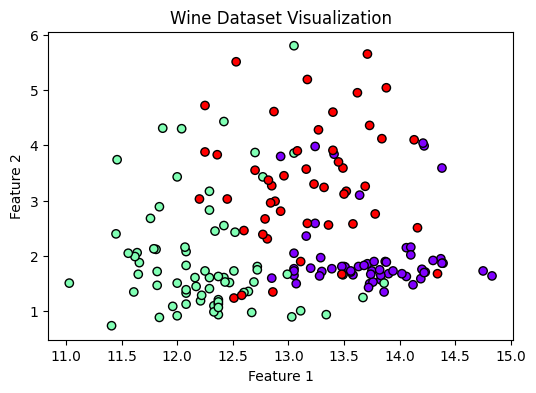

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Dataset Visualization')
plt.show()

###Step 8: Predict a new wine sample

In [24]:
# Step 8: Predict a new wine sample
new_wine = [[13.0, 2.0, 2.4, 16.0, 100.0, 2.8, 3.0, 0.3, 1.8, 5.0, 1.0, 1.05, 800.0]]
prediction = knn.predict(new_wine)
print("Predicted wine class:", wine.target_names[prediction[0]])


Predicted wine class: class_0
